<a class="anchor" id="0."></a>**Contents**
* [1. Summary](#1.)
* [2. Face Recognition](#1e.)
* [3. Olivetti Face Dataset](#2.)
* * [3.1. Show 48 Disticnt People in the Olivetti Dataset](#2.1.)
* * [3.2. Show 10 Face Images of Selected Target](#2.2.)
* [4. Machine Learning Model fo Face Recognition](#3.)
* * [4.1. Split data and target into Random train and test Subsets](#3.1.)
* * [4.2. Principle Component Analysis](#3.2.)
* * [4.3. PCA Projection of Defined Number of Target](#3.3.)
* * [4.4. Finding Optimum Number of Principle Component](#3.4.)
* * [4.5. Show Average Face](#3.5.)
* * [4.6. Show Eigen Faces](#3.5e1.)
* * [4.7. Classification Result](#3.6.)
* * [4.8. More Results](#3.7.)
* * [4.9. Validated Results](#3.8.)
* * [4.10. More Validated Results: Leave One Out vross-validation](#3.9.)
* * [4.11. Hyperparameter Tunning: GridSearcCV](#3.10.)
* * [4.12. Precision-Recall-ROC Curves](#3.11.)
* [5. Linear Discriminant Analysis İle Boyut Azaltma](#5.)
* [6. Machine Learning Automated Workflow: Pipeline](#6.)

[Go to Content Menu](#0.)|[1. ](#1.)|[3.](#2.)|[3.1. ](#2.1.)|[3.2.](#2.2.)|[4.](#3.)|[4.1.](#3.1.)|[4.2.](#3.2.)|[4.3.](#3.3.)|[4.4. ](#3.4.) [4.5. ](#3.5.)|[4.6. ](#3.5e1.)|[4.7. ](#3.6.)|[4.8. ](#3.7.)|[4.9. ](#3.8.)|[4.10.](#3.9.)|[4.11.](#3.10.)|[4.12. ](#3.11.)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Visualization
import matplotlib.pyplot as plt

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

#System
import os
print(os.listdir("../input"))

['olivetti_faces_target.npy', 'olivetti_faces.npy']


In [2]:
import warnings
warnings.filterwarnings('ignore')
print("Warnings ignored!!")

Warnings ignored!!


[Go to Contents Menu](#0.)  |  Quick Links: [1. ](#1.)|[3.](#2.)|[3.1. ](#2.1.)|[3.2.](#2.2.)|[4.](#3.)|[4.1.](#3.1.)|[4.2.](#3.2.)|[4.3.](#3.3.)|[4.4. ](#3.4.) [4.5. ](#3.5.)|[4.6. ](#3.5e1.)|[4.7. ](#3.6.)|[4.8. ](#3.7.)|[4.9. ](#3.8.)|[4.10.](#3.9.)|[4.11.](#3.10.)|[4.12. ](#3.11.)

<a class="anchor" id="1."></a>**1. Summary** 

In this study, face recognition was performed using the face images in the Olivetti data set. The steps for face recognition are as follows:
* Principal  components of face images were obtained by PCA.
* Adequate number of principal  components determined
* According to three different classification models, accuracy score obtained.
* According to three different classification models, cross-validation accuracy score were obtained.
* Parameter optimization of the best model has been made.

[Go to Contents Menu](#0.)  |  Quick Links: [1. ](#1.)|[3.](#2.)|[3.1. ](#2.1.)|[3.2.](#2.2.)|[4.](#3.)|[4.1.](#3.1.)|[4.2.](#3.2.)|[4.3.](#3.3.)|[4.4. ](#3.4.) [4.5. ](#3.5.)|[4.6. ](#3.5e1.)|[4.7. ](#3.6.)|[4.8. ](#3.7.)|[4.9. ](#3.8.)|[4.10.](#3.9.)|[4.11.](#3.10.)|[4.12. ](#3.11.)

<a class="anchor" id="1e."></a>**2.Face Recognition**

The first study on automatic facial recognition systems was performed by Bledsoe between 1964 and 1966. This study was semi-automatic. The feature points on the face are determined manually and placed in the table called RAND. Then, a computer would perform the recognition process by classifying these points. However, a fully functional facial recognition application was performed in 1977 by Kanade. A feature-based approach was proposed in the study. After this date, two-dimensional (2D) face recognition have studied intensively. Three-dimensional (3D) face studies were started to be made after the 2000s.

3D facial recognition approaches developed in a different way than 2D facial recognition approaches. Therefore, it will be more accurate to categorize in 2D and 3D  when discussing face recognition approaches.

We can classify the face recognition researches carried out with 2D approach in three categories; analytical (feature-based, local), global (appearance) and hybrid methods. While analytical approaches want to  recognize by comparing the properties of the facial components, global approaches try to achieve a recognition with data derived from all the face. Hybrid approaches, together with local and global approaches, try to obtain data that expresses the face more accurately.

Face recognition performed in this kernel can assessed under global face recognition approaches.

In analytical approaches, the distance of the determined feature points and the angles between them, the shape of the facial features or the variables containing the regional features are obtained from the face image are used in face recognition. Analytical methods examine the face images in two different ways according to the pattern and geometrical properties. In these methods, the face image is represented by smaller size data, so the big data size problem that increases the computation cost in face recognition  is solved.

Global-based methods are applied to face recognition by researchers because they perform facial recognition without feature extraction which is troublesome in feature based methods. Globally based methods have been used in face recognition since the 1990s, since they significantly improve facial recognition efficiency. Kirby and Sirovich (1990) first developed a method known as Eigenface, which is used in facial representation and recognition based on Principal Component Analysis . With this method, Turk and Pentland transformed the entire face image into vectors and computed eigenfaces with a set of samples. PCA was able to obtain data representing the face at the optimum level with the data obtained from the image. The different facial and illumination levels of the same person were evaluated as the weakness point of PCA.

The face recognition performend in this kernel totally based on Turk and Pentland work. 

[Go to Contents Menu](#0.)  |  Quick Links: [1. ](#1.)|[3.](#2.)|[3.1. ](#2.1.)|[3.2.](#2.2.)|[4.](#3.)|[4.1.](#3.1.)|[4.2.](#3.2.)|[4.3.](#3.3.)|[4.4. ](#3.4.) [4.5. ](#3.5.)|[4.6. ](#3.5e1.)|[4.7. ](#3.6.)|[4.8. ](#3.7.)|[4.9. ](#3.8.)|[4.10.](#3.9.)|[4.11.](#3.10.)|[4.12. ](#3.11.)

<a class="anchor" id="2."></a>**3. Olivetti Dataset** 

Brief information about Olivetti Dataset:

* Face images taken between April 1992 and April 1994.
* There are ten different image of each of 40 distinct people
* There are 400 face images in the dataset
* Face images were taken at different times, variying ligthing, facial express and facial detail
* All face images have black background
* The images are gray level
* Size of each image is 64x64
* Image pixel values were scaled to [0, 1] interval
* Names of 40 people were encoded to an integer from 0 to 39


In [3]:
data=np.load("../input/olivetti_faces.npy")
target=np.load("../input/olivetti_faces_target.npy")

Let's verify above information

In [4]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [5]:
print("unique target number:",np.unique(target))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


[Go to Contents Menu](#0.)  |  Quick Links: [1. ](#1.)|[3.](#2.)|[3.1. ](#2.1.)|[3.2.](#2.2.)|[4.](#3.)|[4.1.](#3.1.)|[4.2.](#3.2.)|[4.3.](#3.3.)|[4.4. ](#3.4.) [4.5. ](#3.5.)|[4.6. ](#3.5e1.)|[4.7. ](#3.6.)|[4.8. ](#3.7.)|[4.9. ](#3.8.)|[4.10.](#3.9.)|[4.11.](#3.10.)|[4.12. ](#3.11.)

<a class="anchor" id="2.1."></a>**3.1. Show 48 Disticnt People in the Olivetti Dataset** 

In [6]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

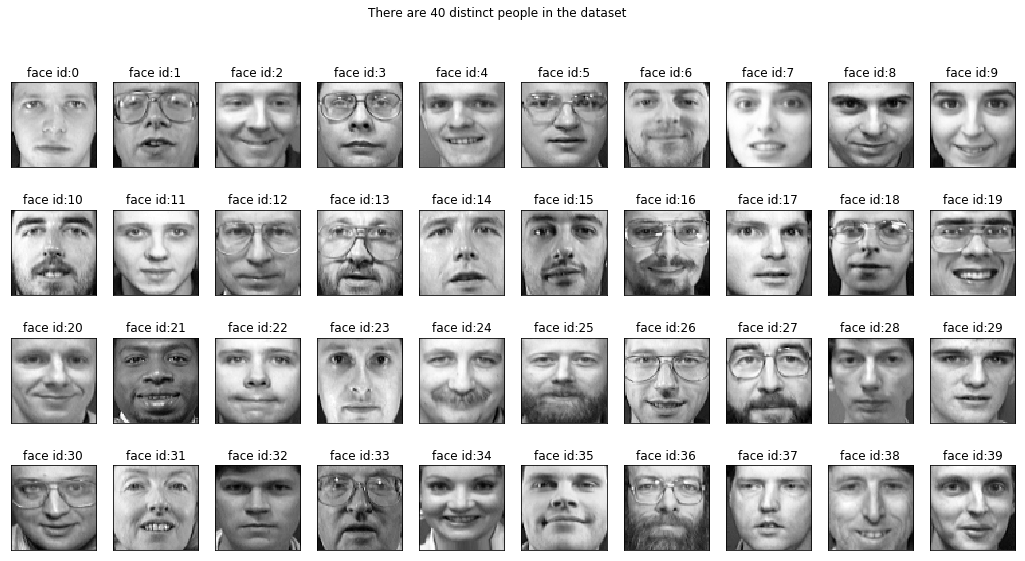

In [7]:
show_40_distinct_people(data, np.unique(target))

As seen in the photo gallery above, the data set has 40 different person-owned, facial images.

<a class="anchor" id="2.2.">

[Go to Contents Menu](#0.)  |  Quick Links: [1. ](#1.)|[3.](#2.)|[3.1. ](#2.1.)|[3.2.](#2.2.)|[4.](#3.)|[4.1.](#3.1.)|[4.2.](#3.2.)|[4.3.](#3.3.)|[4.4. ](#3.4.) [4.5. ](#3.5.)|[4.6. ](#3.5e1.)|[4.7. ](#3.6.)|[4.8. ](#3.7.)|[4.9. ](#3.8.)|[4.10.](#3.9.)|[4.11.](#3.10.)|[4.12. ](#3.11.)

<a  class="anchor" id="2.2."></a>**3.2. Show 10 Face Images of Selected Target** 

In [8]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))
    

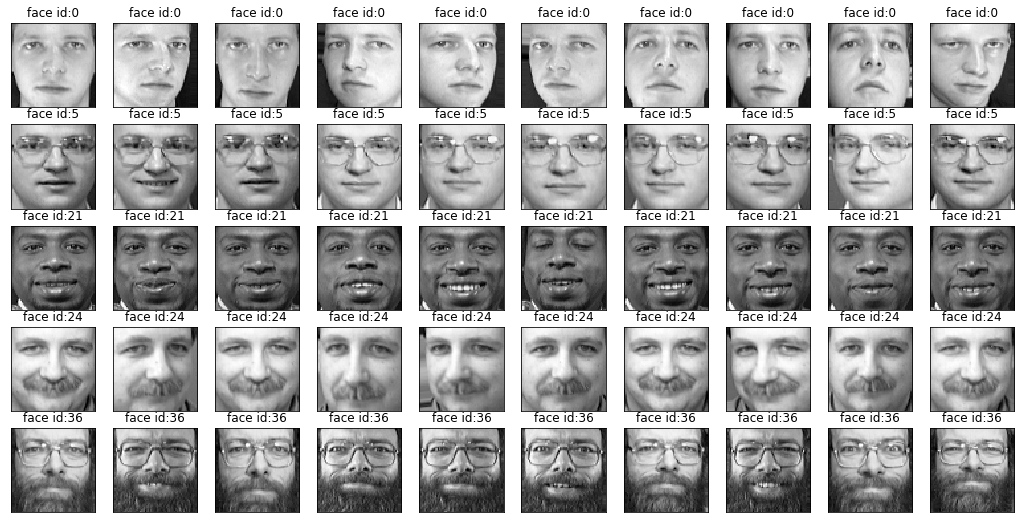

In [9]:
#You can playaround subject_ids to see other people faces
show_10_faces_of_n_subject(images=data, subject_ids=[0,5, 21, 24, 36])

Each face of a subject has different characteristic in context of varying lighting, facial express and facial detail(glasses, beard)

[Go to Contents Menu](#0.)  |  Quick Links: [1. ](#1.)|[3.](#2.)|[3.1. ](#2.1.)|[3.2.](#2.2.)|[4.](#3.)|[4.1.](#3.1.)|[4.2.](#3.2.)|[4.3.](#3.3.)|[4.4. ](#3.4.) [4.5. ](#3.5.)|[4.6. ](#3.5e1.)|[4.7. ](#3.6.)|[4.8. ](#3.7.)|[4.9. ](#3.8.)|[4.10.](#3.9.)|[4.11.](#3.10.)|[4.12. ](#3.11.)

<a class="anchor" id="3."></a>**4. Machine Learning Model fo Face Recognition**

Machine learning models can work on vectors. Since the image data is in the matrix form, it must be converted to a vector.

In [10]:
#We reshape images for machine learnig  model
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


[Go to Contents Menu](#0.)  |  Quick Links: [1. ](#1.)|[3.](#2.)|[3.1. ](#2.1.)|[3.2.](#2.2.)|[4.](#3.)|[4.1.](#3.1.)|[4.2.](#3.2.)|[4.3.](#3.3.)|[4.4. ](#3.4.) [4.5. ](#3.5.)|[4.6. ](#3.5e1.)|[4.7. ](#3.6.)|[4.8. ](#3.7.)|[4.9. ](#3.8.)|[4.10.](#3.9.)|[4.11.](#3.10.)|[4.12. ](#3.11.)

<a class="anchor" id="3.1."></a>**4.1. Split data and target into Random train and test Subsets** 

The data set contains 10 face images for each subject. Of the face images, 70 percent will be used for training, 30 percent for testing. Uses stratify feature to have equal number of training and test images for each subject. Thus, there will be 7 training images and 3 test images for each subject. You can play with training and test rates.

In [11]:
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (280, 4096)
y_train shape:(280,)


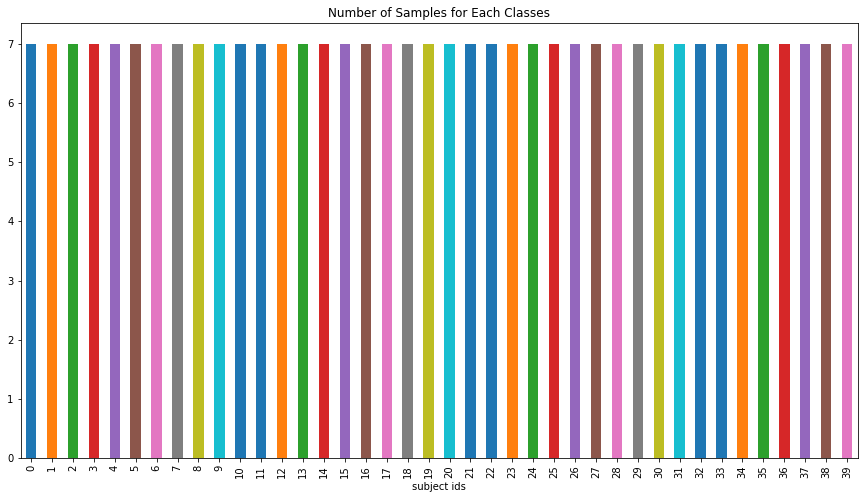

In [12]:
y_frame=pd.DataFrame()
y_frame['subject ids']=y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

[Go to Contents Menu](#0.)  |  Quick Links: [1. ](#1.)|[3.](#2.)|[3.1. ](#2.1.)|[3.2.](#2.2.)|[4.](#3.)|[4.1.](#3.1.)|[4.2.](#3.2.)|[4.3.](#3.3.)|[4.4. ](#3.4.) [4.5. ](#3.5.)|[4.6. ](#3.5e1.)|[4.7. ](#3.6.)|[4.8. ](#3.7.)|[4.9. ](#3.8.)|[4.10.](#3.9.)|[4.11.](#3.10.)|[4.12. ](#3.11.)

<a class="anchor" id="3.2."></a>**4.2.Principle Component Analysis**

Machine learning methods are divided into two: supervised learning and unsupervised learning. In supervised learning, the data set is divided into two main parts: 'data' and 'output'. The data holds the values of the sample in the data set, while the 'output' holds the class (for classification) or the target value (for regression). In unsupervised learning, the data set consists of only the data section.

Non-supervised learning is generally divided into two: data transformation and clustering. In this study, the transformation of the data will be carried out using unsupervised learning. Unsupervised transformation methods allow for easier interpretation of data by computers and people.

The most common unsupervised transformation  applications is to reduce data size. In the size reduction process, the dimension of the data reduced. 

Principle Component Analysis (PCA) is a method that allows data to be represented in a lesser size. According to this method, the data is transformed to new components and the size of the data is reduced by selecting the most important components.

In [13]:
import mglearn

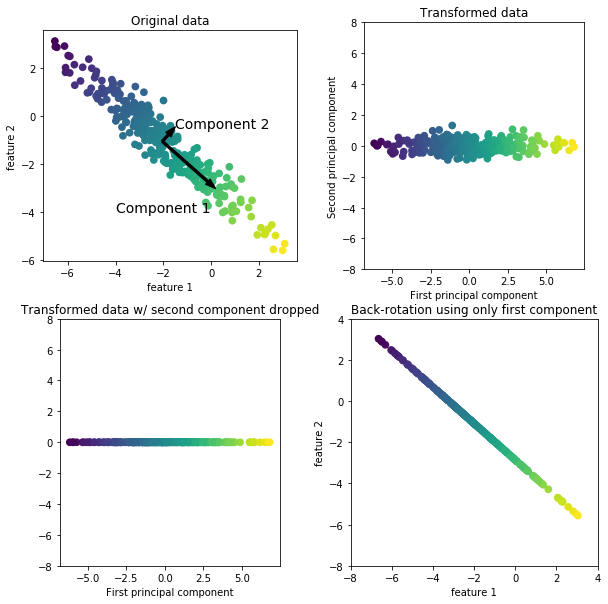

In [14]:
mglearn.plots.plot_pca_illustration()

The above illustration shows a simple example on a synthetic two-dimensional data set. The first drawing shows the original data points colored to distinguish points. The algorithm first proceeds by finding the direction of the maximum variance labeled "Component 1". This refers to the direction in which most of the data is associated, or in other words, the properties that are most related to each other.

Then, when the algorithm is orthogonal (at right angle), it finds the direction that contains the most information in the first direction. There are only one possible orientation in two dimensions at a right angle, but there will be many orthogonal directions (infinite) in high dimensional spaces.

[Go to Contents Menu](#0.)  |  Quick Links: [1. ](#1.)|[3.](#2.)|[3.1. ](#2.1.)|[3.2.](#2.2.)|[4.](#3.)|[4.1.](#3.1.)|[4.2.](#3.2.)|[4.3.](#3.3.)|[4.4. ](#3.4.) [4.5. ](#3.5.)|[4.6. ](#3.5e1.)|[4.7. ](#3.6.)|[4.8. ](#3.7.)|[4.9. ](#3.8.)|[4.10.](#3.9.)|[4.11.](#3.10.)|[4.12. ](#3.11.)

<a class="anchor" id="3.3."></a>**4.3. PCA Projection of Defined Number of Target**

In [15]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

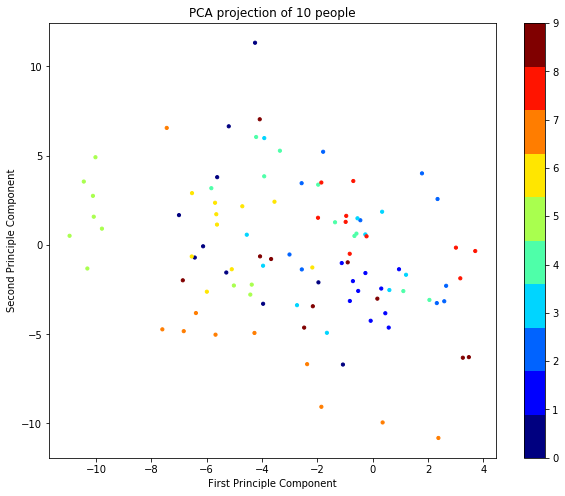

In [16]:
number_of_people=10
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=target[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

[Go to Contents Menu](#0.)  |  Quick Links: [1. ](#1.)|[3.](#2.)|[3.1. ](#2.1.)|[3.2.](#2.2.)|[4.](#3.)|[4.1.](#3.1.)|[4.2.](#3.2.)|[4.3.](#3.3.)|[4.4. ](#3.4.) [4.5. ](#3.5.)|[4.6. ](#3.5e1.)|[4.7. ](#3.6.)|[4.8. ](#3.7.)|[4.9. ](#3.8.)|[4.10.](#3.9.)|[4.11.](#3.10.)|[4.12. ](#3.11.)

<a class="anchor" id="3.4."></a>**4.4. Finding Optimum Number of Principle Component**

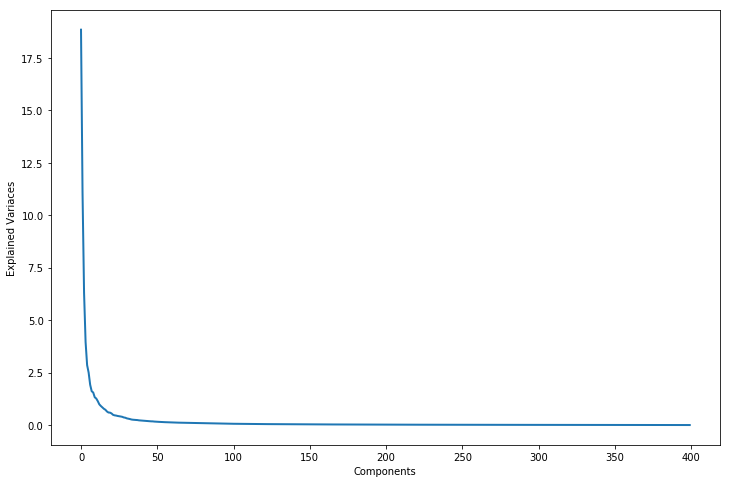

In [17]:
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In the figure above, it can be seen that 90 and more PCA components represent the same data. Now let's make the classification process using 90 PCA components.

In [18]:
n_components=90

In [19]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=90, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

[Go to Contents Menu](#0.)  |  Quick Links: [1. ](#1.)|[3.](#2.)|[3.1. ](#2.1.)|[3.2.](#2.2.)|[4.](#3.)|[4.1.](#3.1.)|[4.2.](#3.2.)|[4.3.](#3.3.)|[4.4. ](#3.4.) [4.5. ](#3.5.)|[4.6. ](#3.5e1.)|[4.7. ](#3.6.)|[4.8. ](#3.7.)|[4.9. ](#3.8.)|[4.10.](#3.9.)|[4.11.](#3.10.)|[4.12. ](#3.11.)

<a class="anchor" id="3.5."></a>**4.5. Show Average Face**  

Text(0.5,1,'Average Face')

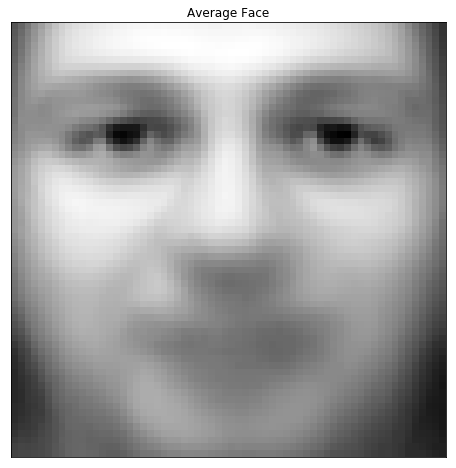

In [20]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

[Go to Contents Menu](#0.)  |  Quick Links: [1. ](#1.)|[3.](#2.)|[3.1. ](#2.1.)|[3.2.](#2.2.)|[4.](#3.)|[4.1.](#3.1.)|[4.2.](#3.2.)|[4.3.](#3.3.)|[4.4. ](#3.4.) [4.5. ](#3.5.)|[4.6. ](#3.5e1.)|[4.7. ](#3.6.)|[4.8. ](#3.7.)|[4.9. ](#3.8.)|[4.10.](#3.9.)|[4.11.](#3.10.)|[4.12. ](#3.11.)

<a class="anchor" id="3.5e1."></a>**4.6. Show Eigen Faces** 

Text(0.5,0.98,'All Eigen Faces')

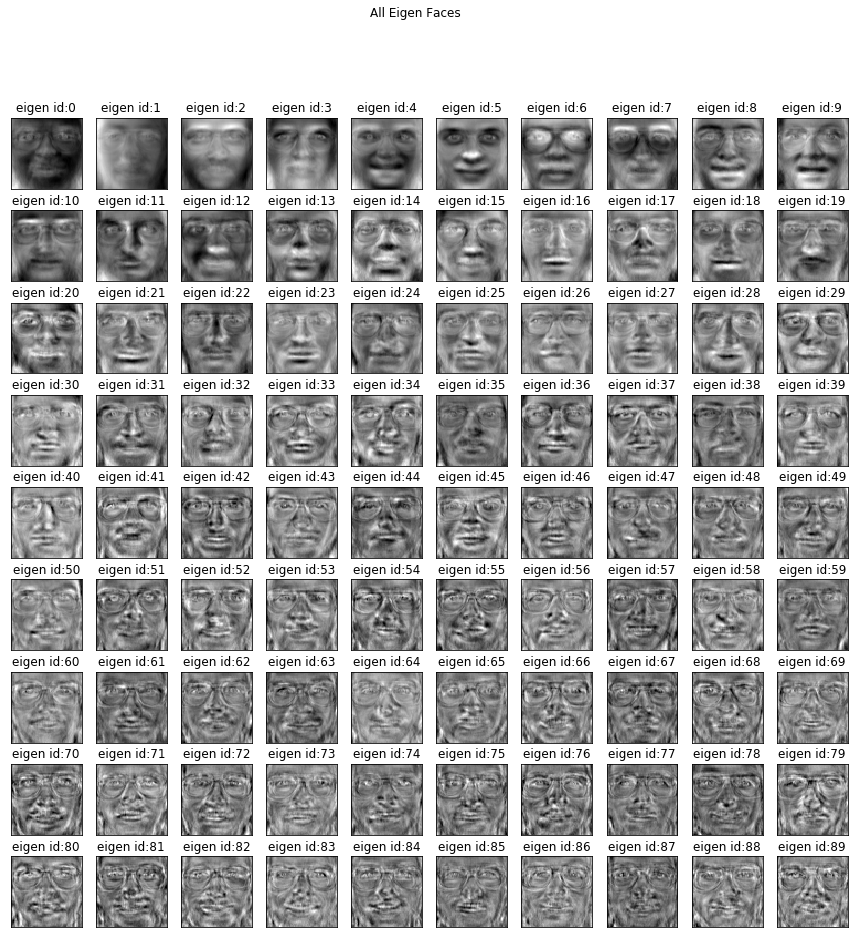

In [21]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

[Go to Contents Menu](#0.)  |  Quick Links: [1. ](#1.)|[3.](#2.)|[3.1. ](#2.1.)|[3.2.](#2.2.)|[4.](#3.)|[4.1.](#3.1.)|[4.2.](#3.2.)|[4.3.](#3.3.)|[4.4. ](#3.4.) [4.5. ](#3.5.)|[4.6. ](#3.5e1.)|[4.7. ](#3.6.)|[4.8. ](#3.7.)|[4.9. ](#3.8.)|[4.10.](#3.9.)|[4.11.](#3.10.)|[4.12. ](#3.11.)

<a class="anchor" id="3.6."></a>**4.7. Classification Results**  

In [22]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [23]:
print(X_train_pca.shape)
print(y_train.shape)
print(X_test_pca.shape)
print(y_test.shape)
print(y_train)

from keras.utils import to_categorical

y_train=to_categorical(y_train,40)
y_test=to_categorical(y_test,40)
print(y_train.shape)

(280, 90)
(280,)
(120, 90)
(120,)
[31 26  9 31 26  5 37 25 13 12 32  7 37 12 22 24 36 24  6  3 26  3 27  3
 22 32  4  2  1 20 29 24 30 34 37 38 25 20 12 35 10 33 27  2 39 16  1  4
 11 11 24 38  4 13 30  3  5  2 35 28  0 21  0 33 23 25 29 27  5  2 14 17
 33 28 34  1 23  6 32 38 36 18 18 33 24 33 16  7 10 30 21 30 11 35  8 22
 33 18 39 26  9  5  2 36 13 15 39 32  6  7  8 38 35 32 34 17  4 11 21 34
 13 32 14 29 23 12 34 37 25 20  6 28 15 24 19  0 24 10 20 14  9 15 21 12
 10 36 17 34 15  3 26  4 35 27 19  9 14 30 31  5 28 34 18 35 20 18 37 16
  2 10 27 36 15 28  1 27 22  9  6 13 14 19 25 16  9  5 30  9  6 18  0 16
 21 23 17 39 18 26 19 15  1 12 25 17 36 16 23  4 22 31 26 14 13  2 21  7
  4 12  7 14 37  3 21 16  8 20  8 27 33 30 28 29  0 37  1 31 11 39 29 38
 35 38 23  5 10 17  1  6 28 15 25  8 23 17 22 11  8 13  7 22  7 39 31 10
  0 19 29 19 36  0 20  8 19 11 32  3 39 38 31 29]
(280, 40)


Using TensorFlow backend.


In [24]:
from keras.models import Sequential
from keras.layers import Dense, Activation

from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dropout

from keras import regularizers

In [25]:
model=Sequential()
model.add(Dense(256, activation='relu', input_dim=90))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(40, activation='softmax'))

epochs=100
batch_size=128
red_lr=ReduceLROnPlateau(monitor='val_acc', factor=0.1, min_delta=0.0001, patience=2, verbose=1)
model.compile(optimizer=Adam(lr=1e-3),loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               23296     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 40)                5160      
Total para

In [26]:
History = model.fit(X_train_pca,y_train, epochs = epochs, validation_data = (X_test_pca,y_test),batch_size=128, verbose = 1)

Train on 280 samples, validate on 120 samples
Epoch 1/100
280/280 [==============================] - 1s 2ms/step - loss: 3.7728 - acc: 0.0393 - val_loss: 3.6222 - val_acc: 0.0417
Epoch 2/100
280/280 [==============================] - 0s 59us/step - loss: 3.6113 - acc: 0.0714 - val_loss: 3.5406 - val_acc: 0.1167
Epoch 3/100
280/280 [==============================] - 0s 55us/step - loss: 3.4463 - acc: 0.1214 - val_loss: 3.4685 - val_acc: 0.1750
Epoch 4/100
280/280 [==============================] - 0s 59us/step - loss: 3.3415 - acc: 0.1786 - val_loss: 3.3942 - val_acc: 0.2333
Epoch 5/100
280/280 [==============================] - 0s 58us/step - loss: 3.2379 - acc: 0.2214 - val_loss: 3.3074 - val_acc: 0.2917
Epoch 6/100
280/280 [==============================] - 0s 58us/step - loss: 3.0957 - acc: 0.3107 - val_loss: 3.2094 - val_acc: 0.3583
Epoch 7/100
280/280 [==============================] - 0s 60us/step - loss: 2.9632 - acc: 0.3857 - val_loss: 3.0959 - val_acc: 0.4417
Epoch 8/100
280/2

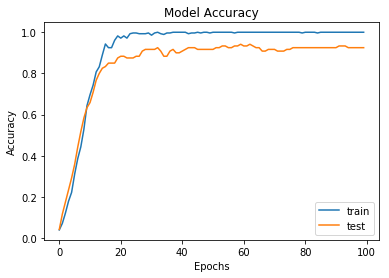

In [27]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

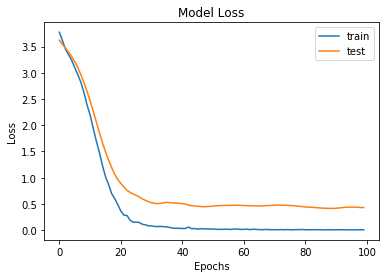

In [28]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()